## Introduction to neural network classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples,noise=0.03,random_state=42)

In [2]:
 import pandas as pd
 circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
 circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


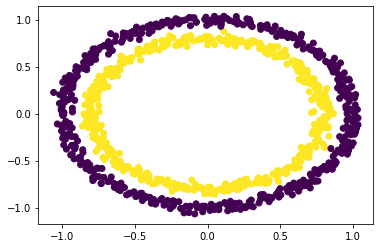

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y)

In [4]:
X.shape, y.shape

((1000, 2), (1000,))

In [5]:
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

In [6]:
import tensorflow as  tf
from sklearn.model_selection import train_test_split


In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
history = model.fit(X_train,y_train,epochs=100)

Epoch 1/100
25/25 [==============================] - 2s 3ms/step - loss: 0.6968 - accuracy: 0.4538
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.4875
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.5000
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.5000
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6845 - accuracy: 0.5013
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6819 - accuracy: 0.5238
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6792 - accuracy: 0.5038
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6768 - accuracy: 0.5000
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6747 - accuracy: 0.5713
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6712 - accuracy: 0.5800
Epoch 11/

In [9]:
model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.2033 - accuracy: 1.0000


[0.20327156782150269, 1.0]

In [10]:
history.history

{'accuracy': [0.45375001430511475,
  0.48750001192092896,
  0.5,
  0.5,
  0.5012500286102295,
  0.5237500071525574,
  0.5037500262260437,
  0.5,
  0.5712500214576721,
  0.5799999833106995,
  0.5600000023841858,
  0.5962499976158142,
  0.6449999809265137,
  0.78125,
  0.8550000190734863,
  0.6974999904632568,
  0.8812500238418579,
  0.7900000214576721,
  0.8100000023841858,
  0.9662500023841858,
  0.9537500143051147,
  0.8412500023841858,
  0.981249988079071,
  0.9175000190734863,
  0.9574999809265137,
  0.9762499928474426,
  0.9762499928474426,
  0.9587500095367432,
  0.9887499809265137,
  0.9787499904632568,
  0.9837499856948853,
  0.9900000095367432,
  0.9900000095367432,
  0.9925000071525574,
  0.9925000071525574,
  0.9887499809265137,
  0.9912499785423279,
  0.9937499761581421,
  0.9950000047683716,
  0.9925000071525574,
  0.9912499785423279,
  0.9962499737739563,
  0.9912499785423279,
  0.9925000071525574,
  0.9975000023841858,
  0.9950000047683716,
  0.9950000047683716,
  0.99624

### Improve model

In [11]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.696825,0.45375
1,0.691786,0.48750
2,0.688848,0.50000
3,0.686669,0.50000
4,0.684478,0.50125
...,...,...
95,0.174998,1.00000
96,0.170121,1.00000
97,0.167025,1.00000
98,0.164230,1.00000


Text(0.5, 1.0, 'Model,loss curve')

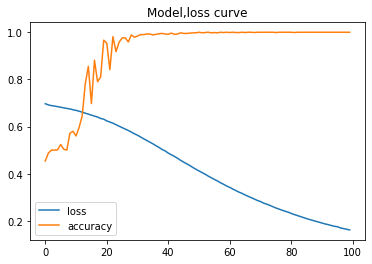

In [12]:
pd.DataFrame(history.history).plot()
plt.title("Model,loss curve")

## Finding the best learning rate

In [13]:
from gc import callbacks
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[2]),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# create a learning rate callback

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4 * 10**(epoch/20))

history = model_9.fit(X_train,y_train,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 4ms/step - loss: 0.6917 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6910 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6903 - accuracy: 0.4975 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.5075 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6888 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6881 - accuracy: 0.5075 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6873 - accuracy: 0.5050 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6864 - accuracy: 0.5088 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss:

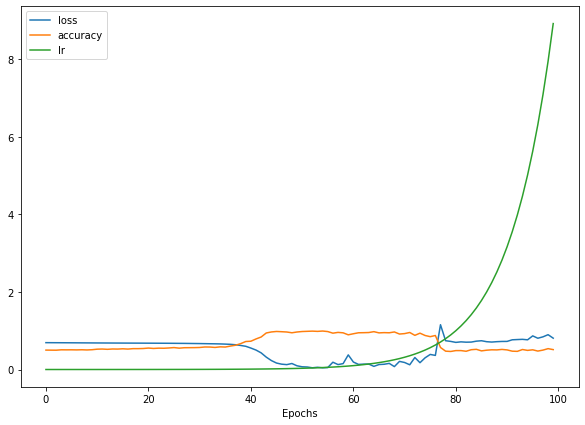

In [14]:
pd.DataFrame(history.history).plot(figsize=(10,7),xlabel="Epochs")

In [15]:
lrs = 1e-4 * 10**(tf.range(100)/20)

Text(0.5, 1.0, 'Loss vs Learning rate')

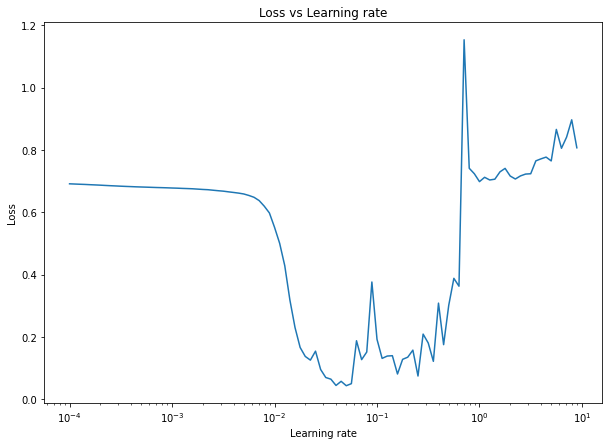

In [16]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history.history["loss"])
plt.ylabel("Loss")
plt.xlabel("Learning rate")
plt.title("Loss vs Learning rate")

In [17]:
tf.random.set_seed(42)
model_10 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.02),
                 metrics=["accuracy"])
history = model_10.fit(X_train,y_train,epochs=25)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6801 - accuracy: 0.5863
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.5888
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6533 - accuracy: 0.6075
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6342 - accuracy: 0.6475
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5787 - accuracy: 0.7200
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5361 - accuracy: 0.7500
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4275 - accuracy: 0.8662
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.3479 - accuracy: 0.9137
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.2778 - accuracy: 0.9350
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.2362 - accuracy: 0.9538
Epoch 11/25
25/25 [

In [18]:
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.1072 - accuracy: 0.9750


[0.107170470058918, 0.9750000238418579]

## More classification evaluation metrics

* Accuracy
* Precision
* Recall
* Confusion matrix

In [19]:
loss,accuracy = model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1072 - accuracy: 0.9750


In [20]:
# create a confusion matrix
from sklearn.metrics import confusion_matrix

y_preds = model_10.predict(X_test)
conf = confusion_matrix(y_test,tf.round(y_preds))

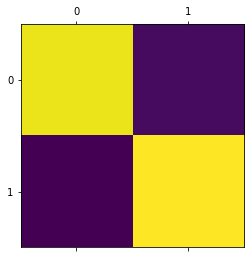

In [21]:
plt.matshow(conf)

## Working with multclass classification

In [22]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [23]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


9


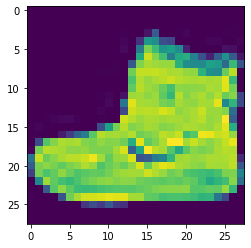

In [24]:
plt.imshow(X_train[0])
print(y_train[0])

In [25]:
X_train.shape

(60000, 28, 28)

In [26]:
classe_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

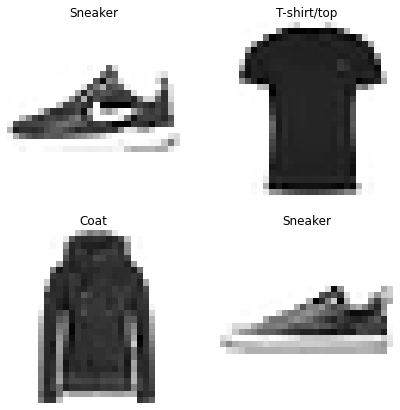

In [27]:
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(X_train)))
  plt.imshow(X_train[rand_index],cmap=plt.cm.binary)
  plt.title(classe_names[y_train[rand_index]])
  plt.axis(False)

In [28]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])

model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
non_norm_hist = model_11.fit(X_train,tf.one_hot(y_train,depth=10),epochs=10,validation_data=(X_test,tf.one_hot(y_test,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1792 - accuracy: 0.1608 - val_loss: 1.8065 - val_accuracy: 0.2020
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7194 - accuracy: 0.2439 - val_loss: 1.6586 - val_accuracy: 0.3100
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6398 - accuracy: 0.2831 - val_loss: 1.6194 - val_accuracy: 0.2739
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6125 - accuracy: 0.2902 - val_loss: 1.6007 - val_accuracy: 0.3046
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5963 - accuracy: 0.3058 - val_loss: 1.5776 - val_accuracy: 0.3338
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5880 - accuracy: 0.3124 - val_loss: 1.5642 - val_accuracy: 0.3196
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5782 - accuracy: 0.3196 - val_loss: 1.5733 - val_accuracy:

In [29]:
model_11.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 4)                 3140      
                                                                 
 dense_9 (Dense)             (None, 4)                 20        
                                                                 
 dense_10 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [30]:
X_train_norm = X_train/255
X_test_norm = X_test/255

In [31]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
norm_hist = model_12.fit(X_train_norm,y_train,epochs=10,validation_data=(X_test_norm,y_test))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

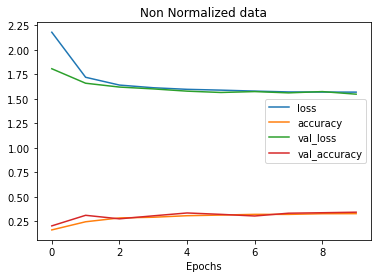

In [32]:
pd.DataFrame(non_norm_hist.history).plot(title="Non Normalized data",xlabel="Epochs")

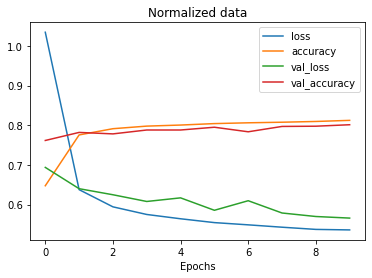

In [33]:
pd.DataFrame(norm_hist.history).plot(title="Normalized data",xlabel="Epochs")

In [34]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# lerning rate scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3*10**(epoch/20))


lr_hist = model_13.fit(X_train_norm,
             y_train,
             callbacks=[lr_scheduler],
             epochs=40,
             validation_data=(X_test_norm,y_test))

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

Text(0.5, 1.0, 'Finding Ideal learning rate')

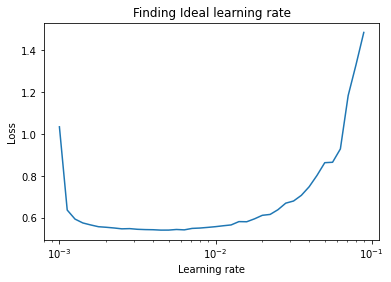

In [35]:
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, lr_hist.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding Ideal learning rate")